### Testing of the code during development

Looking at the M1-1 dataset

In [1]:
import os
import glob
from oyv.imports import *
import importlib

playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


In [2]:
%matplotlib inline

In [3]:
os.chdir('/home/oyvindl/work/code/git_public/sigpyproc/testing/development/')

In [7]:
# Load the modules
os.chdir('../../')
from sigpyproc import sig_funcs, sig_append, sig_calc, sig_draft
os.chdir('testing/development/')

In [5]:
# Load converted data from M1-1
floc = '/media/oyvindl/ratatosk/data/mooring_data/signature500/m1_1/converted/*'
flist = glob.glob(floc)
for fn in flist:
    if '_avgd' in fn:
        flist.remove(fn)

In [192]:
# RELOAD the sig_func module
#os.chdir('../../')
importlib.reload(sig_funcs)
importlib.reload(sig_append)
importlib.reload(sig_calc)
importlib.reload(sig_draft)

#os.chdir('testing/development/')

<module 'sigpyproc.sig_draft' from '/home/oyvindl/work/code/git_public/sigpyproc/sigpyproc/sig_draft.py'>

In [128]:
DX = sig_funcs.matfiles_to_dataset(flist)#[:2], )

/home/oyvindl/work/code/git_public/sigpyproc/sigpyproc/sig_append.py:256: RuntimeWarning: invalid value encountered in sqrt
  180 / np.pi* np.arccos(np.sqrt(
/home/oyvindl/work/code/git_public/sigpyproc/sigpyproc/sig_append.py:265: RuntimeWarning: invalid value encountered in sqrt
  180 / np.pi* np.arccos(np.sqrt(


1870992 time points, 38979 ensembles. Sample per ensemble: 48
Done. Run sig_funcs.overview() to print some additional details.


###### Append msl and CTD


In [129]:
dmsl = pickle_load('CARRA_MSL_M1_temp.p')

In [130]:
DX = sig_append.append_atm_pres(DX, dmsl.MSL, dmsl.time)

In [131]:
dctd = pickle_load('CARRA_CTD_M1_1_temp.p')

In [132]:
DX = sig_append.set_lon(DX, 30)
DX = sig_append.set_lat(DX, 80)

In [133]:
DX = sig_append.append_ctd(DX, dctd.TEMP, dctd.SP, dctd.pres, dctd.time)

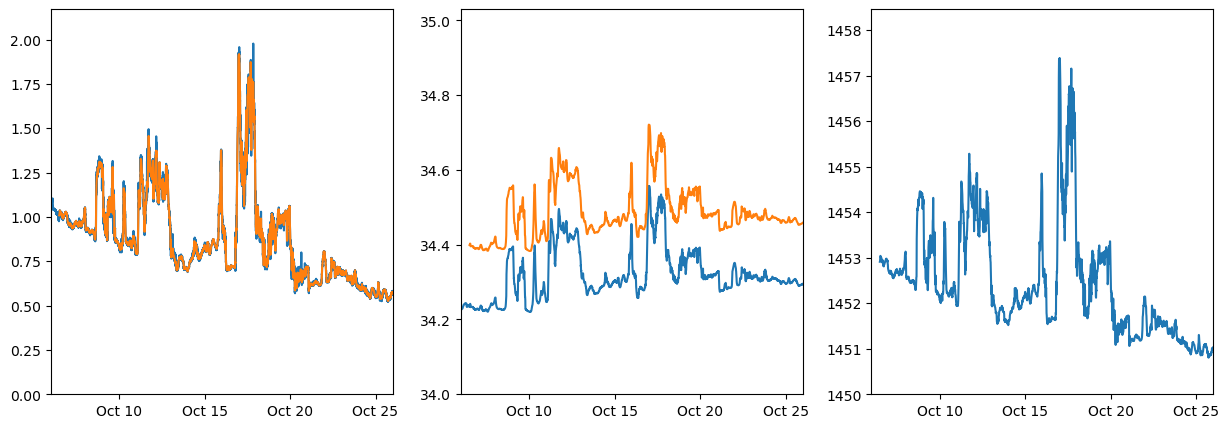

In [135]:
fig, ax = plt.subplots(1, 3, sharex =True, figsize = (15, 5))
ax[0].plot(dctd.time, dctd.TEMP)
ax[0].plot(DX.TIME, DX.CT_CTD)
ax[1].plot(dctd.time, dctd.SP)
ax[1].plot(DX.TIME, DX.SA_CTD)
ax[2].plot(DX.TIME, DX.sound_speed_CTD)
ax[0].set_xlim(17810, 17830)
ax[0].set_ylim(0, None)
ax[1].set_ylim(34, None)
ax[2].set_ylim(1450, None)
for axn in ax:
    pl.md_xlab(axn, mdays =  np.arange(5, 35, 5))

In [173]:
DX = sig_calc.dep_from_p(DX, corr_CTD_density=True)

In [193]:
importlib.reload(sig_draft)
DX= sig_draft.calculate_surface_position(DX, corr_sound_speed_CTD=True, qual_thr = 8250)
print(DX.SURFACE_DEPTH.max(), np.sum(np.isnan(DX.SURFACE_DEPTH)))
DX= sig_draft.calculate_surface_position(DX, corr_sound_speed_CTD=True, qual_thr = 100)
print(DX.SURFACE_DEPTH.max(), np.sum(np.isnan(DX.SURFACE_DEPTH)))

<xarray.DataArray 'SURFACE_DEPTH' ()>
array(5.77109579) <xarray.DataArray 'SURFACE_DEPTH' ()>
array(16881)
<xarray.DataArray 'SURFACE_DEPTH' ()>
array(5.77109579) <xarray.DataArray 'SURFACE_DEPTH' ()>
array(4896)


In [118]:

def find_ow_correction(DX, median_window_days = 15):
    '''
    Find the water surface during (unambiguously) open-water conditions
    '''

    surface_ow = DX.SURFACE_DEPTH.data.copy()
    surface_ow[DX.ICE_IN_SAMPLE_ANY] = np.nan
    
    return su

In [195]:
surface_ow = DX.SURFACE_DEPTH.data.copy()
surface_ow[DX.ICE_IN_SAMPLE_ANY] = np.nan

In [202]:
np.unique(np.nanmedian(surface_ow, axis = 1))

array([-0.36989739, -0.35847565, -0.31538007, ...,  3.3210819 ,
        3.459397  ,         nan])

In [236]:
print(np.nanpercentile(np.nanmedian(surface_ow, axis = 1), 99.5))
print(np.nanpercentile(np.nanmedian(surface_ow, axis = 1), 0.5))


1.0666774052345716
-0.171937833485871


(array([0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        3.000e+00, 1.200e+01, 1.600e+01, 5.600e+01, 9.000e+01, 2.490e+02,
        4.760e+02, 1.042e+03, 2.025e+03, 3.229e+03, 3.338e+03, 1.880e+03,
        9.640e+02, 4.180e+02, 2.030e+02, 1.180e+02, 8.000e+01, 5.200e+01,
        6.000e+01, 4.100e+01, 3.600e+01, 3.100e+01, 2.400e+01, 1.400e+01]),
 array([-0.5       , -0.46666667, -0.43333333, -0.4       , -0.36666667,
        -0.33333333, -0.3       , -0.26666667, -0.23333333, -0.2       ,
        -0.16666667, -0.13333333, -0.1       , -0.06666667, -0.03333333,
         0.        ,  0.03333333,  0.06666667,  0.1       ,  0.13333333,
         0.16666667,  0.2       ,  0.23333333,  0.26666667,  0.3       ,
         0.33333333,  0.36666667,  0.4       ,  0.43333333,  0.46666667,
         0.5       ]),
 <BarContainer object of 30 artists>)

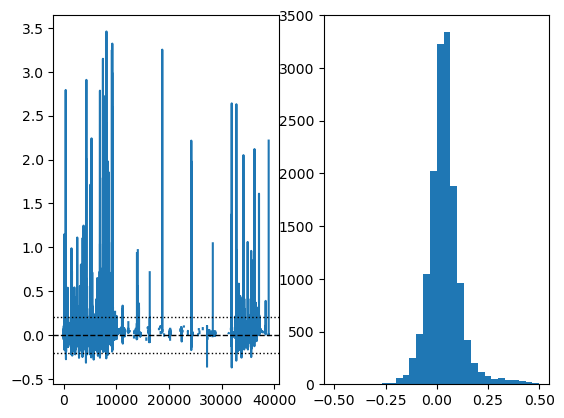

In [201]:
surface_ow = DX.SURFACE_DEPTH.data.copy()
surface_ow[DX.ICE_IN_SAMPLE_ANY] = np.nan

fig, ax = plt.subplots(1, 2, )
#ax.hist(np.nanmedian(surface_ow, axis = 1), 30, range = (-0.5, 0.5))
ax[0].plot(np.nanmedian(surface_ow, axis = 1))
pl.hline(-0, ax[0], ls = '--' )
pl.hline(-0.2, ax[0], ls = ':' )
pl.hline(+0.2, ax[0], ls = ':' )
ax[1].hist(np.unique(np.nanmedian(surface_ow, axis = 1)), 30, range = (-0.5, 0.5))


In [240]:
surface_ow_med = np.nanmedian(surface_ow, axis = 1)
# Reject values outside the [1th, 99th] percentile range
pct_a = np.nanpercentile(surface_ow_med, 1)
pct_b = np.nanpercentile(surface_ow_med, 95)
surface_ow_med[surface_ow_med<pct_a] = np.nan
surface_ow_med[surface_ow_med>pct_b] = np.nan

In [282]:
DX.ICE_IN_SAMPLE_ANY.sum(axis = 0)

<xarray.DataArray 'ICE_IN_SAMPLE_ANY' (SAMPLE: 48)>
array([25299, 25312, 25240, 25258, 25246, 25279, 25274, 25194, 25194,
       25136, 25103, 25050, 25074, 25075, 25073, 25074, 25160, 25188,
       25212, 25226, 25283, 25210, 25209, 25278, 25287, 25293, 25294,
       25292, 25264, 25337, 25292, 25330, 25321, 25363, 25320, 25302,
       25341, 25325, 25397, 25350, 25386, 25378, 25367, 25285, 25369,
       25345, 25354, 25318])
Coordinates:
  * SAMPLE   (SAMPLE) int64 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48

/home/oyvindl/anaconda3/envs/oyv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/home/oyvindl/anaconda3/envs/oyv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


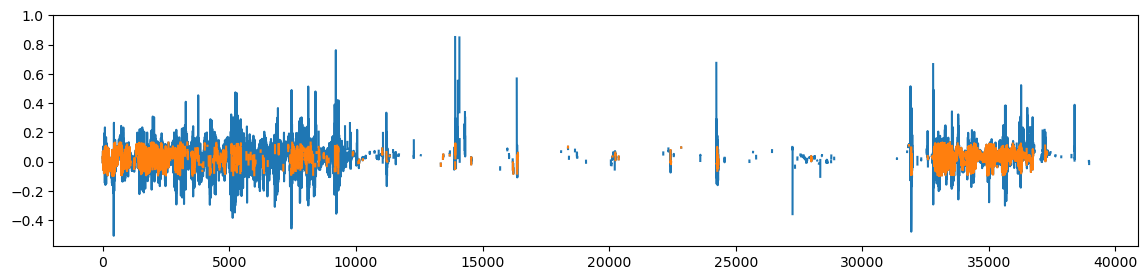

In [484]:
surface_ow = DX.SURFACE_DEPTH.data.copy()
surface_ow[DX.ICE_IN_SAMPLE_ANY] = np.nan
surface_ow[surface_ow>1] = np.nan
surface_ow[surface_ow<-1] = np.nan

surface_ow_med = np.nanmedian(surface_ow, axis = 1)

surface_ow_med[DX.ICE_IN_SAMPLE_ANY.sum(axis = 1)>0] = np.nan

# Reject values outside the [1th, 99th] percentile range
pct_a = np.nanpercentile(surface_ow_med, 5)
pct_b = np.nanpercentile(surface_ow_med, 95)
surface_ow_med[surface_ow_med<pct_a] = np.nan
surface_ow_med[surface_ow_med>pct_b] = np.nan

fig, ax = plt.subplots(figsize = (14, 3))
#ax.hist(np.nanmedian(surface_ow, axis = 1), 30, range = (-0.5, 0.5))
ax.plot(np.nanmedian(surface_ow, axis = 1))
ax.plot(surface_ow_med)


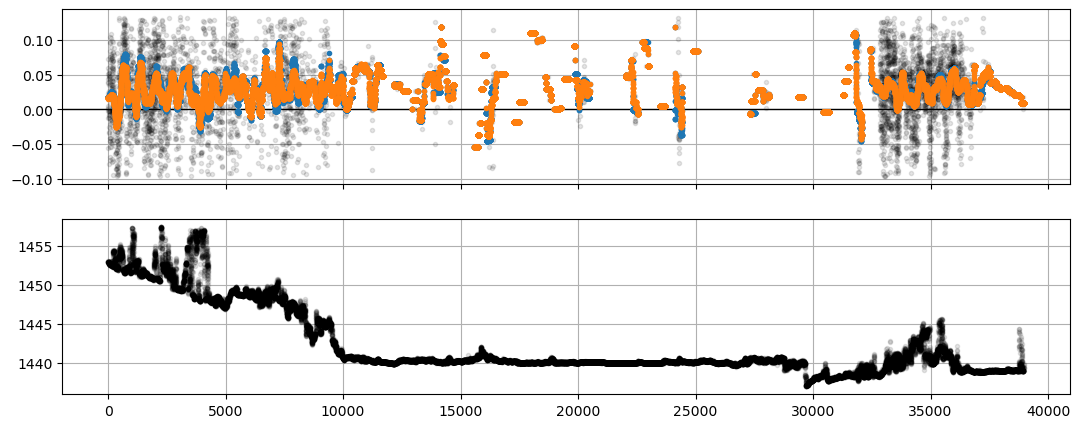

In [287]:

fig, ax = plt.subplots(2, 1, figsize = (13, 5), sharex = True)
#ax.hist(np.nanmedian(surface_ow, axis = 1), 30, range = (-0.5, 0.5))

ax[0].plot(surface_ow_med, '.k', alpha = 0.1)
pl.hline(0, ax = ax[0])
rs_days = 3

plot_SD = False

ax[0].plot(rs(surface_ow_med, 3*24*rs_days+1).median, '.', color = col.col('b'))

if plot_SD:
    ax[0].plot(rs(surface_ow_med, 3*24*rs_days+1).median + rs(surface_ow_med, 3*24*31+1).std,
               '--', color = col.col('b'))
    ax[0].plot(rs(surface_ow_med, 3*24*rs_days+1).median - rs(surface_ow_med, 3*24*31+1).std,
               '--', color = col.col('b'))


ax[0].plot(rs(surface_ow_med, 3*24*rs_days+1).mean, '.', color = col.col('o'))

if plot_SD:
    ax[0].plot(rs(surface_ow_med, 3*24*rs_days+1).mean - rs(surface_ow_med, 3*24*31+1).std,
               '--', color = col.col('o'))
    ax[0].plot(rs(surface_ow_med, 3*24*rs_days+1).mean + rs(surface_ow_med, 3*24*31+1).std,
               '--', color = col.col('o'))
ax[0].grid()

ax[1].plot(DX.sound_speed_CTD, '.k', alpha = 0.1)
ax[1].grid()


In [517]:

def daily_median(A, t, td = None, axis = -1):
    '''
    Take a time series A on a time grid t and compute daily medians of A.

    If day index *td* is not specified, it will be computed based on t. 

    A can be 1- or 2-dimensional, but the time axis must be the last axis.

    Returns:
    --------

    td: Day index (note: not the "mean time" - this would be approx. td+0.5)
    Ad: Daily means
    '''

    tfl = np.floor(t)
    if td is None:
        td = np.ma.unique(tfl)

    Nt = len(td)

    if A.ndim == 1:
        Ad_shape = (Nt)
    elif A.ndim == 2:
        Ad_shape = (A.shape[0], Nt)
    else:
        raise Exception('''
        *daily_median()* only works for 1D or 2D arrays.
        ''')

    Ad = np.ma.zeros(Ad_shape)
    Ad.mask = True

    for nn in np.arange(Nt):
        tind = tfl==td[nn]
        if tind.any():
            Ad[..., nn] = np.nanmedian(A[..., tind], axis = -1)

    return Ad, td

In [521]:
tMED

masked_array(data=[17810., 17811., 17812., 17813., 17814., 17815., 17816.,
                   17817., 17818., 17819., 17820., 17821., 17822., 17823.,
                   17824., 17825., 17826., 17827., 17828., 17829., 17830.,
                   17831., 17832., 17833., 17834., 17835., 17836., 17837.,
                   17838., 17839., 17840., 17841., 17842., 17843., 17844.,
                   17845., 17846., 17847., 17848., 17849., 17850., 17851.,
                   17852., 17853., 17854., 17855., 17856., 17857., 17858.,
                   17859., 17860., 17861., 17862., 17863., 17864., 17865.,
                   17866., 17867., 17868., 17869., 17870., 17871., 17872.,
                   17873., 17874., 17875., 17876., 17877., 17878., 17879.,
                   17880., 17881., 17882., 17883., 17884., 17885., 17886.,
                   17887., 17888., 17889., 17890., 17891., 17892., 17893.,
                   17894., 17895., 17896., 17897., 17898., 17899., 17900.,
                   17901.

In [522]:
##  Filter to daily
SMED, tMED_ = daily_median(np.nanmedian(surface_ow, axis = 1), DX.TIME);
tMED = tMED + 0.5

/home/oyvindl/anaconda3/envs/oyv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/home/oyvindl/anaconda3/envs/oyv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/home/oyvindl/anaconda3/envs/oyv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/home/oyvindl/anaconda3/envs/oyv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/home/oyvindl/anaconda3/envs/oyv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, fu

In [527]:
np.nanmax(surface_ow_cap)

/tmp/ipykernel_8012/2028784231.py:1: RuntimeWarning: All-NaN slice encountered
  np.nanmax(surface_ow_cap)


nan

In [535]:
rs?

In [ ]:
fig, ax = plt.subplots(3, 1, figsize = (14, 10), sharex = True, sharey = True)

ax[0].plot(DX.time_average, DX.SURFACE_DEPTH, '.k', alpha = 0.01)
ax[1].plot(DX.time_average, DX.SURFACE_DEPTH, '.k', alpha = 0.01)
ax[2].plot(DX.time_average, DX.SURFACE_DEPTH, '.k', alpha = 0.01)



surface_ow = DX.SURFACE_DEPTH.data.copy()
surface_ow[DX.ICE_IN_SAMPLE] = np.nan
#surface_ow[surface_ow>1] = np.nan
#surface_ow[surface_ow<-1] = np.nan
ax[1].plot(DX.time_average, surface_ow, '.', color = col.col('b'), alpha = 0.2)
ax[1].plot(DX.time_average, np.nanmedian(surface_ow, axis = 1), '.', color = col.col('o'), alpha = 0.2)

ax[1].plot(DX.TIME, surface_ow_med, '.r', alpha = 1)

##  Filter to daily
surface_ow_cap = surface_ow.copy()
surface_ow_cap[surface_ow_cap>0.2] = np.nan
surface_ow_cap[surface_ow_cap<-0.2] = np.nan

SMED, tMED_ = daily_median(np.nanmedian(surface_ow_cap, axis = 1), DX.TIME);
tMED = tMED + 0.5
ax[2].plot(tMED, SMED, '.b', alpha = 1)

#ax[2].plot(tMED, rs(SMED, 7, min_ng=5).median, '-r', alpha = 1)
ax[2].plot(tMED, rs(rs(SMED, 7, min_ng=5).median, 31).mean, '-b', alpha = 1, lw = 2)

ax[0].set_xlim(18100, 18150)
ax[0].set_xlim(17800, 18150)

ax[0].set_ylim(-0.2, 1)

/home/oyvindl/anaconda3/envs/oyv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/home/oyvindl/anaconda3/envs/oyv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/home/oyvindl/anaconda3/envs/oyv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/home/oyvindl/anaconda3/envs/oyv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/home/oyvindl/anaconda3/envs/oyv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, fu

(-0.2, 1.0)

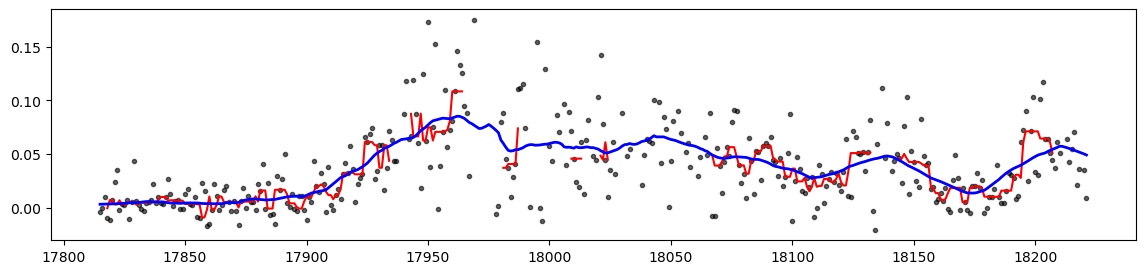

In [543]:
fig, ax = plt.subplots(figsize = (14, 3))
ax.plot(tMED, SMED, '.k', alpha = 0.6)

ax.plot(tMED, rs(SMED, 7, min_ng=7).median, '-r', alpha = 1)
ax.plot(tMED, rs(rs(SMED, 7, min_ng=5).median, 31).mean, '-b', alpha = 1, lw = 2)


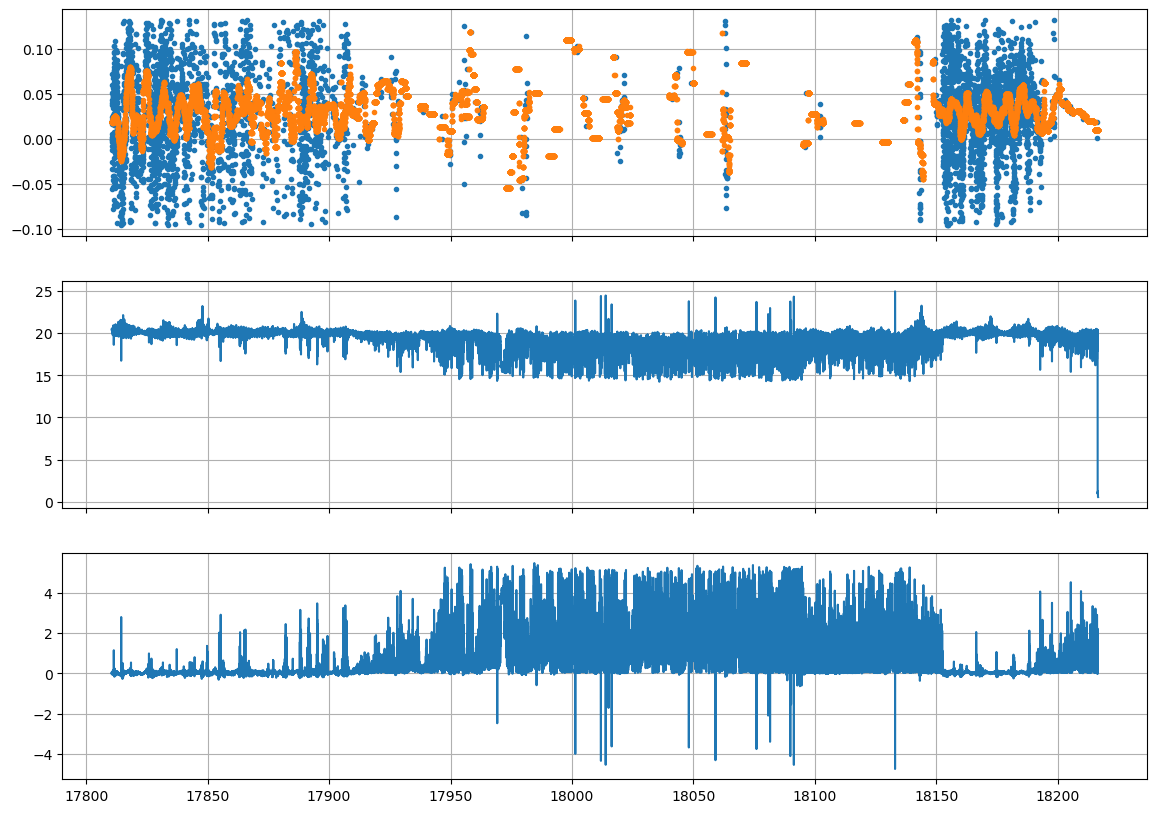

In [457]:
fig, ax = plt.subplots(3, 1, sharex = True, figsize = (14, 10))

ax[0].plot(DX.TIME, surface_ow_med, '.', color = col.col('b'))
ax[0].plot(DX.TIME, rs(surface_ow_med, 3*24*rs_days+1).median, '.', color = col.col('o'))
ax[1].plot(DX.TIME, np.nanmedian(DX.Average_AltimeterDistanceAST, axis = 1))
ax[2].plot(DX.TIME, np.nanmedian(DX.SURFACE_DEPTH, axis = 1))

ax[0].grid()
ax[1].grid()
ax[2].grid()

#ax[0].set_xlim(31000, 33000)

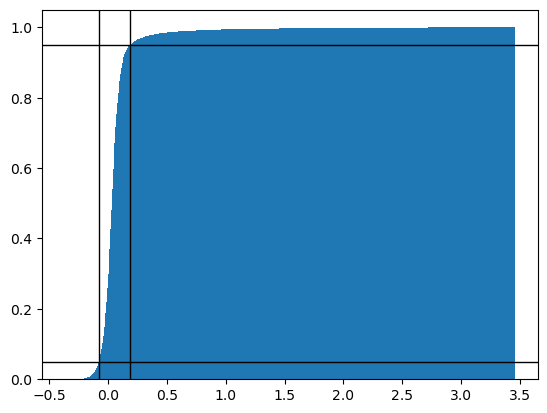

In [227]:
fig, ax = plt.subplots()
ax.hist(np.nanmedian(surface_ow, axis = 1), 1000, cumulative=True, density = True);
#ax.plot(np.nanmedian(surface_ow, axis = 1))
pl.hline(0.95, ax = ax)
pl.hline(0.05, ax = ax)
pl.vline(np.nanpercentile(np.nanmedian(surface_ow, axis = 1), 5), ax = ax)
pl.vline(np.nanpercentile(np.nanmedian(surface_ow, axis = 1), 95), ax = ax)

In [116]:
DX.SURFACE_DEPTH

<xarray.DataArray 'SURFACE_DEPTH' (TIME: 3555, ENSEMBLE: 48)>
array([[ 0.01081668,  0.3298871 , -0.58606549, ..., -0.24596395,
         0.07595983, -0.1706607 ],
       [ 0.00553291,  0.05141906, -0.24519521, ..., -0.36310091,
        -0.02832719,  0.43857891],
       [-1.04884857, -0.30615144,  0.29775771, ..., -0.3658723 ,
         0.23240089,  0.053703  ],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * TIME     (TIME) float64 1.781e+04 1.781e+04 ... 1.822e+04 1.822e+04
Dimensions without coordinates: ENSEMBLE
Attributes:
    long_name:  Depth of the scattering surface observed by the Altimeter
    units:      m
    note:       From AST altimeter distances.\n\nComputed with the function s...

(array([ 5., 43., 44., 34., 30., 67., 77., 65., 42., 45., 40., 25., 33.,
        24., 10., 19., 10.,  6., 12., 13.,  7.,  4.,  7.,  1.,  0.,  6.,
         3.,  2.,  3.,  1.,  5.,  2.,  3.,  1.,  4.,  4.,  5.,  1.,  1.,
         4.,  1.,  2.,  2.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  1.,  2.,  0.,  0.,  1.,  2.,  1.,  1.,  3.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.01378903,  0.0271145 ,  0.06801803,  0.10892157,  0.1498251 ,
         0.19072863,  0.23163216,  0.27253569,  0.31343923,  0.35434276,
         0.39524629,  0.43614982,  0.47705335,  0.51795689,  0.55886042,
         0.59976395,  0.64066748,  0.68157102,  0.72247455,  0.76337808,
         0.80428161,  0.84518514,  0.88608868,  0.92699221,  0.96789574,
         1.00879927,  1.0497028 ,  1.09060634,  1.13150987,  1.172413

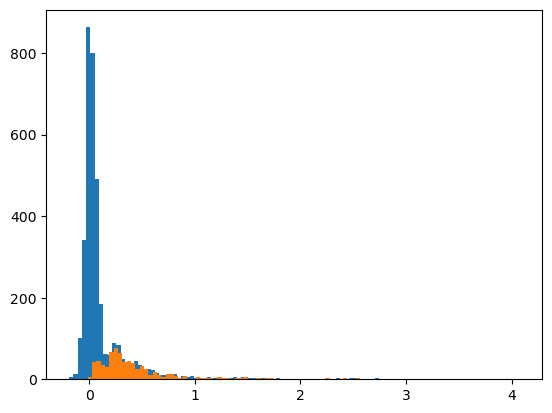

In [214]:
fig, ax = plt.subplots()
ax.hist(DX.SURFACE_DEPTH.mean(axis = 1), 100)
ax.hist(DX.SEA_ICE_DRAFT_MEDIAN, 100)


In [215]:
DX.sound_speed_CTD

<xarray.DataArray 'sound_speed_CTD' (TIME: 3555)>
array([1452.91000232, 1452.91842873, 1452.98353269, ...,           nan,
                 nan,           nan])
Coordinates:
  * TIME     (TIME) float64 1.781e+04 1.781e+04 ... 1.822e+04 1.822e+04
Attributes:
    long_name:               Sound speed
    units:                   m s-1
    Instrument description:  None
    Instrument SN:           None
    note:                    Calculated using the gsw module. Linearly interp...

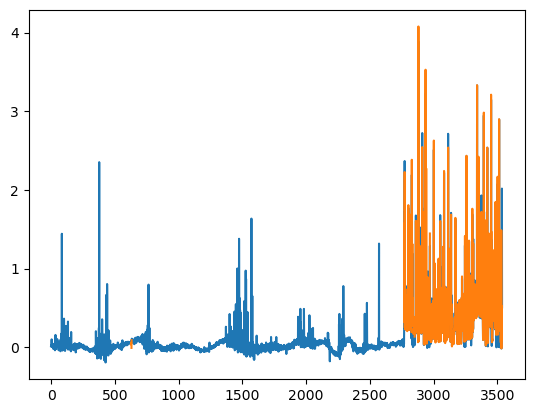

In [216]:
fig, ax = plt.subplots()
ax.plot(DX.SURFACE_DEPTH.mean(axis = 1))
ax.plot(DX.SEA_ICE_DRAFT_MEDIAN)

In [88]:
DX = sig_draft.calculate_surface_position(DX)

In [90]:
DX.Average_AltimeterDistanceAST

<xarray.DataArray 'Average_AltimeterDistanceAST' (TIME: 3555, SAMPLE: 48)>
array([[20.302954  , 19.976751  , 20.88669   , ..., 20.559713  ,
        20.234442  , 20.470144  ],
       [20.305473  , 20.24968   , 20.55375   , ..., 20.718475  ,
        20.367237  , 19.898516  ],
       [21.45017   , 20.672514  , 20.015337  , ..., 20.71852   ,
        20.08733   , 20.251133  ],
       ...,
       [ 0.5513362 ,  0.55310076,  0.55430025, ...,  0.5546465 ,
         0.55070555,  0.55858815],
       [ 0.5527211 ,  0.5442152 ,  0.5442306 , ...,  0.54832923,
         0.5507394 ,  0.5452383 ],
       [ 0.54580766,  0.546404  ,  0.5489835 , ...,  0.5436946 ,
         0.543467  ,  0.5442937 ]], dtype=float32)
Coordinates:
  * TIME     (TIME) float64 1.781e+04 1.781e+04 ... 1.822e+04 1.822e+04
  * SAMPLE   (SAMPLE) int64 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48

In [93]:
DX.ICE_IN_SAMPLE

<xarray.DataArray 'ICE_IN_SAMPLE' (TIME: 3555, SAMPLE: 48)>
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
  * TIME     (TIME) float64 1.781e+04 1.781e+04 ... 1.822e+04 1.822e+04
  * SAMPLE   (SAMPLE) int64 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48
Attributes:
    long_name:  Identification of sea ice in sample (conservative estimate)
    desc:       Binary classification (ice/not ice), where "ice" is when FOM ...

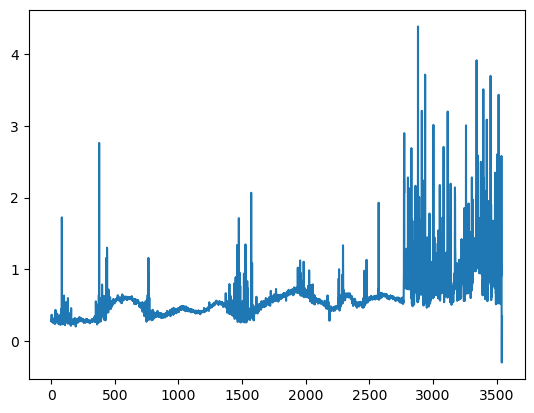

In [92]:
fig, ax = plt.subplots()
ax.plot(DX.SURFACE_DEPTH.mean(axis = 1))

In [44]:
DX.g

<xarray.DataArray 'g' ()>
array(9.83061582)
Attributes:
    units:    ms-2
    note:     Calculated using gsw.grav() for p=0 and lat=80.00

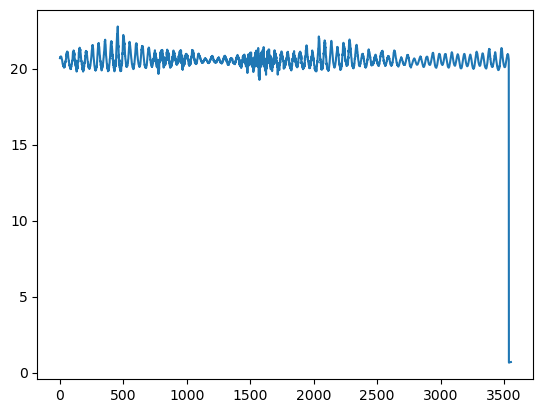

In [43]:
fig, ax = plt.subplots()
ax.plot(DX.depth[:, 0])

In [ ]:
DX.ICE_IN_SAMPLE

In [ ]:
fig, ax = plt.subplots(figsize = (16, 3))
ax.plot(rs(DX.SIC_FOM, 71).mean)
ax.plot(rs(DX.SIC_FOM_ALT, 71).mean, ':', alpha = 0.8)

In [ ]:
DX.SIC_FOM

In [ ]:
DX.lat

In [ ]:
imp.reload(sig_append)

In [ ]:
sig_append.lat(DX, 2)

In [ ]:
DX.var

In [ ]:
DX.SIC_FOM_ALT

In [ ]:
DX.sampling_interval_sec

In [ ]:
DX.Plan_ProfileInterval/60

In [ ]:
## Print some stuff with the overview() function
sig_funcs.overview(DX)

In [ ]:
fig, ax = plt.subplots()
ax.plot(DX.Average_AltimeterPressure[:, 0])
ax.plot(DX.Average_Pressure[:, 0])
ax.set_ylim()

In [ ]:
DX.A

In [ ]:
fig, ax = plt.subplots()
ax.plot(DX.Average_AltimeterPressure[:, 0]-DX.Average_Pressure[:, 0])

In [ ]:
DX.attrs

In [ ]:
ca()

In [ ]:
DX.Average_AltimeterDistanceAST

In [ ]:
nn = int(np.random.rand()*DX.dims['TIME'])
print(nn)
fig, ax = plt.subplots()
ax.plot(DX.Average_AltimeterDistanceAST[nn, :])

In [ ]:
fig, ax = plt.subplots()
ax.hist(DX.Average_AltimeterQualityAST.to_numpy().flatten(), 100)

In [ ]:
DX

### Check that the time looks reasonable

In [ ]:
DX.dims['TIME']

In [ ]:
fig, ax = plt.subplots()
ax.plot(DX['TIME'])

In [ ]:
from matplotlib.dates import num2date 

In [ ]:
def overview(DX):
    '''
    Prints some basic information about the dataset.
    '''

    # Time range
    datefmt = '%d %b %Y %H:%M'
    starttime = num2date(DX.TIME[0]).strftime(datefmt)
    endtime = num2date(DX.TIME[-1]).strftime(datefmt)
    ndays = DX.TIME[-1]-DX.TIME[0]

    print('\nTIME RANGE:\n%s  -->  %s  (%.1f days)'%(
        starttime, endtime, ndays))

    # Size
    print('\nSIZE:\nTotal %i time points.'%(DX.dims['TIME']*DX.dims['SAMPLE']))
    print('Split into %i ensembles with %i sample per ensemble.'%(
          DX.dims['TIME'], DX.dims['SAMPLE']))
    print('Ocean velocity bins: %i.'%(DX.dims['bins']))

In [ ]:
#### Have a look at the altimeter record

In [ ]:
DX.caonf

In [ ]:
overview(DX)

In [ ]:
num2date(DX.TIME[0])

In [ ]:
DX = sig_funcs.matfiles_to_dataset(flist, reshape = False)

In [ ]:
DXX = sig_funcs.reshape_ensembles(DX)

In [ ]:
os.chdir('../testing/basic_test/')

In [ ]:
ls

In [ ]:
DX

In [ ]:
mean_FOM = DX[nm].mean(axis = 1)


In [ ]:
sl = slice(None, None, 100)
fig, ax = plt.subplots(4, 1, sharex = True, sharey = True)
for nn in np.arange(1, 5):
    nm = 'AverageIce_FOMBeam%i'%nn
    mean_FOM = DX[nm].mean(axis = 1)
    ax[nn-1].hist(mean_FOM/ mean_FOM.max(), 25, alpha = 0.8, )

In [ ]:
sl = slice(None, None, 100)
fig, ax = plt.subplots()
for nn in np.arange(1, 5):
    nm = 'AverageIce_FOMBeam%i'%nn
    ax.plot(DX[nm].to_numpy().flatten()[sl]/ DX[nm].to_numpy().flatten()[sl].max()+(nn-1)*1.1, 'o', alpha = 0.1)

In [ ]:
sl = slice(10000, 10100)
fig, ax = plt.subplots()
ax.hist(DX.AverageIce_FOMBeam1.to_numpy().flatten(), 1000)

In [ ]:
ice_class_FOM(DX, threshold = 500)

In [ ]:
sl = slice(10000, 10100)
fig, ax = plt.subplots()
ax.plot(DX.to_array())

In [ ]:
def ice_class_from_FOM(DX, FOM_thr = 300)

# Spectral investigation

In [324]:
OW_LAB =~np.bool_(np.sum(DX.ICE_IN_SAMPLE, axis = 1))
ICE_LAB =np.bool_(np.sum(DX.ICE_IN_SAMPLE, axis = 1))

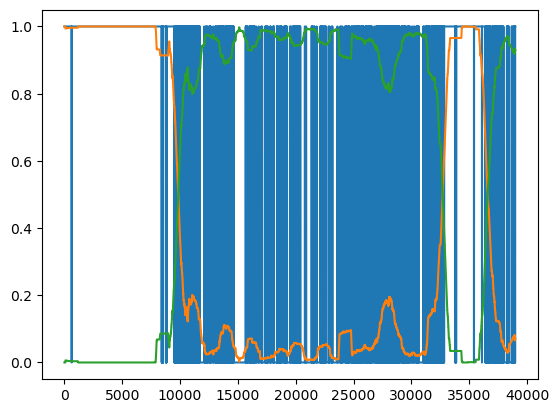

In [325]:
fig, ax = plt.subplots()
ax.plot(OW_LAB)
ax.plot(rs(OW_LAB, 3*24*15+1).mean)
ax.plot(rs(ICE_LAB, 3*24*15+1).mean)

In [310]:
from oyv.num import spec

In [315]:
from scipy.signal import detrend

In [326]:
OW_LAB.sum(), ICE_LAB.sum()

(15125, 23854)

In [341]:
np.bool_(np.isnan(SURF_OW).sum(axis = 1))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [342]:
np.isnan(SURF_OW)

<xarray.DataArray 'SURFACE_DEPTH' (TIME: 28, ENSEMBLE: 48)>
array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])
Coordinates:
  * TIME     (TIME) float64 1.79e+04 1.79e+04 1.79e+04 ... 1.822e+04 1.822e+04
Dimensions without coordinates: ENSEMBLE
Attributes:
    long_name:  Depth of the scattering surface observed by the Altimeter
    units:      m
    note:       From AST altimeter distances.\n\nComputed with the function s...

In [447]:
SURF_OW_ = DX.SURFACE_DEPTH[OW_LAB]
SURF_ICE_ = DX.SURFACE_DEPTH[ICE_LAB]
print('ICE SHAPE: %i'%SURF_ICE_.shape[0])
print('NOT ICE SHAPE: %i'%SURF_OW_.shape[0])

SURF_OW = SURF_OW_[~np.bool_(np.isnan(SURF_OW_).sum(axis = 1))]
SURF_ICE = SURF_ICE_[~np.bool_(np.isnan(SURF_ICE_).sum(axis = 1))]
t_OW =  DX.TIME[OW_LAB][~np.bool_(np.isnan(SURF_OW_).sum(axis = 1))]
t_ICE =  DX.TIME[ICE_LAB][~np.bool_(np.isnan(SURF_ICE_).sum(axis = 1))]

print('After removing Nans:')
print('ICE SHAPE (Any nans? : %s) : %i'%(np.isnan(SURF_ICE.data).any(), SURF_ICE.shape[0]))
print('NOT ICE SHAPE (Any nans? : %s) : %i'%(np.isnan(SURF_OW.data).any(), SURF_OW.shape[0]))

ICE SHAPE: 23854
NOT ICE SHAPE: 15125
After removing Nans:
ICE SHAPE (Any nans? : False) : 23780
NOT ICE SHAPE (Any nans? : False) : 15097


In [355]:
SURF_OW_detr = spectra.detrend(SURF_OW.data, axis = -1)
SURF_ICE_detr = spectra.detrend(SURF_ICE.data, axis = -1)

In [360]:
# Quick check detrend
print('%.2f'%SURF_OW.mean(axis = 0).mean())
print('%.2f'%SURF_OW_detr.mean(axis = 0).mean())

0.08
0.00


In [443]:
spectra.spectrum?

In [379]:
S_OW = spectra.spectrum(SURF_OW, nfft = None, axis = -1)
S_ICE = spectra.spectrum(SURF_ICE, nfft = None, axis = -1)

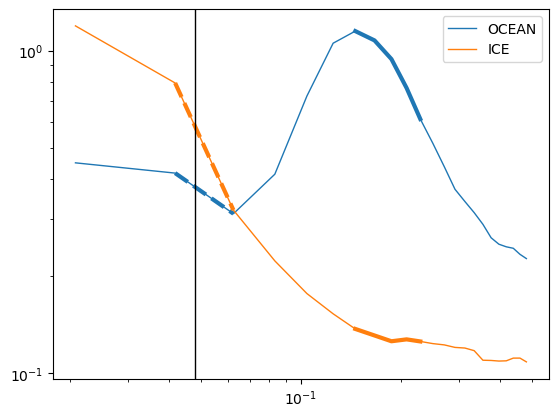

In [444]:
fig, ax = plt.subplots()
sl1 =  slice(1, 3)
sl2 =  slice(6, 11)

ax.plot(S_OW.freqs, S_OW.psd.mean(axis = 0), lw = 1, color = col.col('b'), label = 'OCEAN')
ax.plot(S_OW.freqs[sl1], S_OW.psd.mean(axis = 0)[sl1], '--', lw = 3, color = col.col('b'),)
ax.plot(S_OW.freqs[sl2], S_OW.psd.mean(axis = 0)[sl2], lw = 3, color = col.col('b'))

ax.plot(S_ICE.freqs, S_ICE.psd.mean(axis = 0), lw = 1, color = col.col('o'), label = 'ICE')
ax.plot(S_ICE.freqs[sl1], S_ICE.psd.mean(axis = 0)[sl1], '--', lw = 3, color = col.col('o'))
ax.plot(S_ICE.freqs[sl2], S_ICE.psd.mean(axis = 0)[sl2], lw = 3, color = col.col('o'),)
ax.set_yscale('log')
ax.set_xscale('log')

pl.vline(0.3/(2*np.pi))
plt.legend()

In [427]:
S_OW.psd.shape

(15097, 23)

In [428]:
LFE_OW = S_OW.psd[:, sl1].mean(axis = 1)
LFE_ICE = S_ICE.psd[:, sl1].mean(axis = 1)

HFE_OW = S_OW.psd[:, sl2].mean(axis = 1)
HFE_ICE = S_ICE.psd[:, sl2].mean(axis = 1)

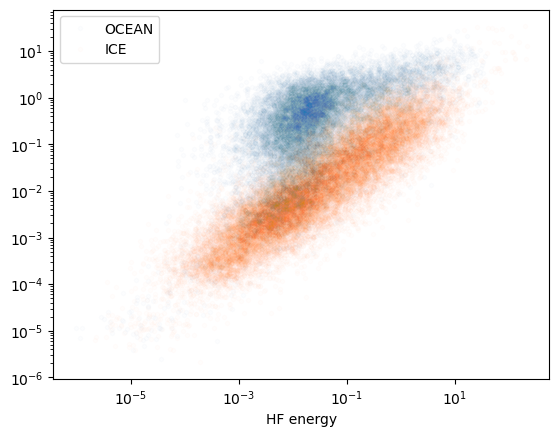

In [432]:
fig, ax = plt.subplots()
ax.plot(LFE_OW, HFE_OW, '.', alpha = 0.01, label = 'OCEAN')
ax.plot(LFE_ICE, HFE_ICE, '.', alpha = 0.01, label = 'ICE')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('LF energy')
ax.set_xlabel('HF energy')
ax.legend()

(-5.0, 10.0)

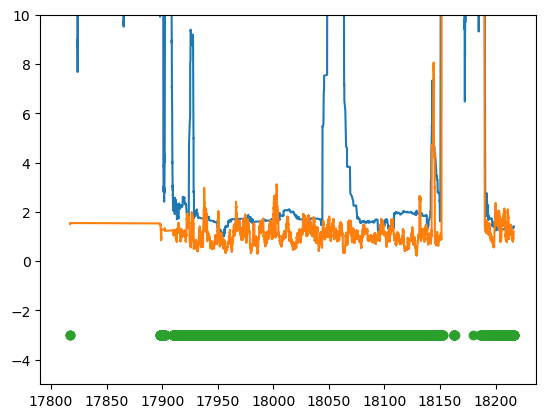

In [455]:
fig, ax = plt.subplots()
ax.plot(t_OW, rs(HFE_OW/LFE_OW, 101).mean,)# **hist_kws)
ax.plot(t_ICE, rs(HFE_ICE/LFE_ICE, 101).mean,)# **hist_kws)
ax.plot(t_ICE, 0*HFE_ICE/LFE_ICE-3,'o')# **hist_kws)
ax.set_ylim(-5, 10)

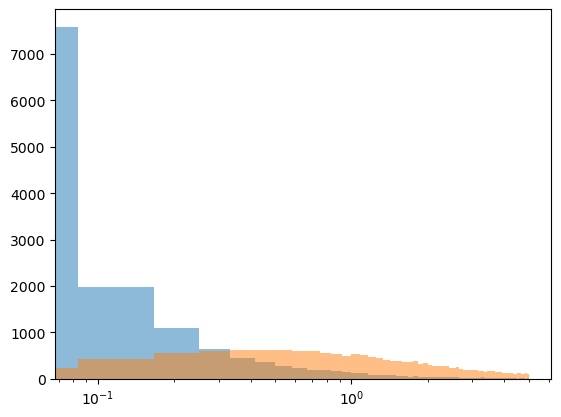

In [453]:
fig, ax = plt.subplots()
hist_kws = {'range':(0, 5), 'bins':60, 'alpha':0.5}
ax.hist(LFE_OW/HFE_OW, **hist_kws)
ax.hist(LFE_ICE/HFE_ICE, **hist_kws)
ax.set_xscale('log')

In [309]:
from pycurrents.num import spectra

In [ ]:
sl = 